## Tuning another hyper-parameter
It looks like a good choice for depth is somewhere between 2 and 5. Let's tune the **`min_samples_split`** parameter

In [42]:
depths = np.arange(1, 32)
splits = np.arange(2, 20)

all_scores = np.zeros((len(depths), len(splits)))
for i, depth in enumerate(depths):
    for j, split in enumerate(splits):
        dtc = DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
        scores = cross_val_score(dtc, X, y)
        all_scores[i, j] = scores.mean()

## Use a heatmap to visualize combinations

In [43]:
import seaborn as sns

Text(87,0.5,'max_depth')

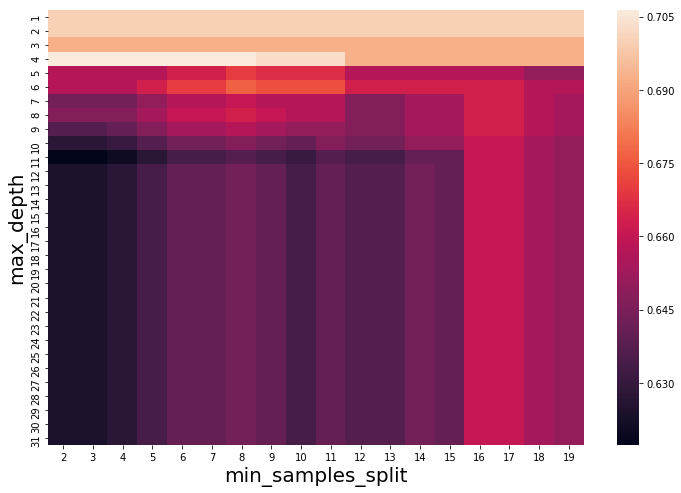

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(all_scores, ax=ax, xticklabels=splits, yticklabels=depths)
ax.set_xlabel('min_samples_split', size=20)
ax.set_ylabel('max_depth', size=20)

# This is tedious when trying to find optimal hyper-parameters
We could continue to nest our for loops for each new hyper-parameter, but that would quickly get out of control. Let's go ahead and save this as our 'final' model. 

In [52]:
dtc_final_manual = DecisionTreeClassifier(max_depth=4, min_samples_split=6)